# Mann and Morrison Algorithm

Mann and Morrison algorithm was developed to predict the RMS values of voltage, current, phase angle of a undistoreted sinusoidal waveform, using a minimum of three samples. In the following iPython notebook we will derive the relations used by Mann and Morrison algorithm to predict the above mentioned values. Also, we will develop a simulation to predict the values from the samples

 Assume that the input voltage to any relay be of the form: 

$v(t_{k}) = V_{m}sin(\omega t_{k} + \theta {v}) $ ---------------(1)

As a part of our simulation, let us now generate the samples for waveform defined by equation(1) with peak voltage $V_{m} = 110V$, angular frequency $\omega = 2\times\pi\times50 = 100\pi$ and phase $\theta_{v} = 30^{\circ}$

Populating the interactive namespace from numpy and matplotlib
T	 Vm	 dT	 f_samp	 f_sig	 omega	 over_samp_factor	 t	 theta_v	 
v_tk	 


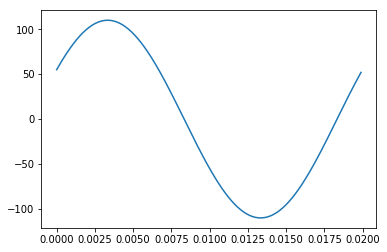

In [4]:
%who
%pylab inline

from __future__ import division
import numpy as np

Vm = 110       #peak voltage
f_sig = 50    #frequency
theta_v = 30  #in degrees
omega = 2*np.pi*f_sig

over_samp_factor = 100
f_samp = 2 *f_sig*over_samp_factor #sampling frequency
T = 1/f_sig #signal period
dT = 1/f_samp #sample period

t = np.arange(0,T,dT)
v_tk = Vm * np.sin(omega*t + theta_v*np.pi/180)
plot(t,v_tk)


Now that we have our waveform ready let us proceed with our derivation by differentiating our input voltage defined by equation (1)

$v'(t_{k}) = \omega V_{m} cos(\omega t_{k}+\theta _{v})$

From which we can obtain our equation(2) as:

$\large{\frac{v'(t_{k})}{\omega V_{m}}}$ $= cos(\omega t_{k}+\theta _{v})$ ---------------(2)

Squaring and adding equations (1) and (2) gives us 

$V_{m}^2 = (v(t_{k}))^2 + \large{(\frac{v'(t_{k})}{\omega})}^2$ 

$\therefore V_{m} = \sqrt{(v(t_{k}))^2 + \large{(\frac{v'(t_{k})}{\omega})}^2}$---------------(3)

For a discrete time system we compute $v'(t_{k})$ using the central difference formula:

$v'(t_{k}) = \large{\frac {v_{k+1} - v_{k-1}}{2\Delta t}}$ ---------------(4)

Equations (3) and (4) can now be used to estimate the peak voltage. Notice that equations (3) and (4) use a minimum of three samples $v_{k+1}, v_k $ and $ v_{k+1}$. Let us now use the samples stored in the array v_tk defined by the earlier code snippet  and equations (3) and (4) to estimate the peak voltage    

In [13]:
N = v_tk.size # calculate total number of samples

v_dash = (v_tk[2:N]-v_tk[0:N-2])/(2*dT) #implement eqn (4)
Vm_est = sqrt(v_tk[1:N-1]**2 + ((v_dash)/(omega))**2) #implement eqn(3)
error = (Vm-Vm_est)*100/Vm

# print first 50 estimations
print 'Estimation No.\tFirst Derivative\tEstimated Peak Voltage\tPercentage Error'
for i in range(0,50):
    print i+1,'\t\t',v_dash[i],'\t\t',Vm_est[i],'\t\t',error[i]

Estimation No.	First Derivative	Estimated Peak Voltage	Percentage Error
1 		29365.3520838 		109.986931131 		0.011880790416
2 		28778.9572653 		109.987447892 		0.0114110077032
3 		28164.1610905 		109.987978486 		0.0109286491025
4 		27521.5702889 		109.98852082 		0.0104356184314
5 		26851.8190203 		109.989072752 		0.00993386159925
6 		26155.5682481 		109.989632105 		0.00942535892768
7 		25433.5050878 		109.990196671 		0.00891211733195
8 		24686.3421286 		109.990764221 		0.0083961623996
9 		23914.8167302 		109.991332517 		0.00787953039525
10 		23119.690295 		109.991899314 		0.00736426022362
11 		22301.7475166 		109.992462376 		0.00685238538439
12 		21461.7956061 		109.993019481 		0.00634592594614
13 		20600.6634943 		109.993568431 		0.00584688057508
14 		19719.2010149 		109.994107059 		0.00535721865023
15 		18818.2780647 		109.99463324 		0.00487887249163
16 		17898.7837461 		109.995144897 		0.0044137297371
17 		16961.6254889 		109.995640012 		0.0039636258958
18 		16007.7281551 		109.99611